In [1]:
from rlagent.agent import Agent
from rlagent.simulation import Simulator
from torch import nn

## Cartpole V2 Model

#### Agent Configuration

In [2]:
agent_config = {
    'action_cnt':2,
    'feature_cnt':4,
    'gamma':0.99999,
    'memory_size':50000,
    'batch_size':128,
    'batch_cnt':5,
    'lr':0.01,
    'epsilon':0.90,
    'epsilon_decay':0.997,
    'epsilon_min':0.10,
    'smoothing':0.25,
    'weight_filepath':'model_weights/cartpole.pth'
}

#### State Transition Model

In [3]:
class StateTransitionModel(nn.Module):
    def __init__(self,feature_cnt,action_cnt):
        super(StateTransitionModel, self).__init__()
        
        hidden_layer_cnt = 64
        
        self.fc1 = nn.Linear(feature_cnt,hidden_layer_cnt)
        self.fc2 = nn.Linear(hidden_layer_cnt,action_cnt)
    
    def forward(self,x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

agent_config['transition_model'] = StateTransitionModel(4,2)

#### Simulation Configuration

In [4]:
simulator_config = {
    #'gym_model_name':'CartPole-v1',
    'train_model':True,
    'training_epochs':2000,
    'visualize_test':True,
    'score_model_performance':True,
    'early_stopping_condition':(4,500),
    'performance_plot_dir':'',
    'plot_filepath':'plots/cartpole_plots.png'
}

In [5]:
agent = Agent(**agent_config)

sim = Simulator(gym_model_name = 'CartPole-v1',agent=agent,**simulator_config)

{'action_cnt': 2, 'feature_cnt': 4, 'gamma': 0.99999, 'memory_size': 50000, 'batch_size': 128, 'batch_cnt': 5, 'lr': 0.01, 'epsilon': 0.9, 'epsilon_decay': 0.997, 'epsilon_min': 0.1, 'smoothing': 0.25, 'weight_filepath': 'model_weights/cartpole.pth', 'transition_model': StateTransitionModel(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)}


Epoch: 25/2000, Rewards: (25, 86.9), Loss: 110.96958465576172,Epsilon: 0.8348750206807242, Memory: 2766
Epoch: 50/2000, Rewards: (50, 9.7), Loss: 29.55295753479004,Epsilon: 0.7744625557295997, Memory: 5900
Epoch: 75/2000, Rewards: (75, 9.2), Loss: 42.44068031311035,Epsilon: 0.7184216024791069, Memory: 9395
Epoch: 100/2000, Rewards: (100, 9.1), Loss: 220.0411636352539,Epsilon: 0.6664358335858043, Memory: 13502
Epoch: 125/2000, Rewards: (125, 9.8), Loss: 1195.7603424072265,Epsilon: 0.6182118114970268, Memory: 18027
Epoch: 150/2000, Rewards: (150, 8.8), Loss: 6695.192138671875,Epsilon: 0.5734773321207204, Memory: 23029
Epoch: 175/2000, Rewards: (175, 9.5), Loss: 12902.037353515625,Epsilon: 0.5319798883491259, Memory: 28376
Epoch: 200/2000, Rewards: (200, 9.4), Loss: 26362.5884765625,Epsilon: 0.49348524476356237, Memory: 33713
Epoch: 225/2000, Rewards: (225, 29.9), Loss: 11652.664599609376,Epsilon: 0.4577761154751239, Memory: 40661
Epoch: 250/2000, Rewards: (250, 146.1), Loss: 9590.1927246

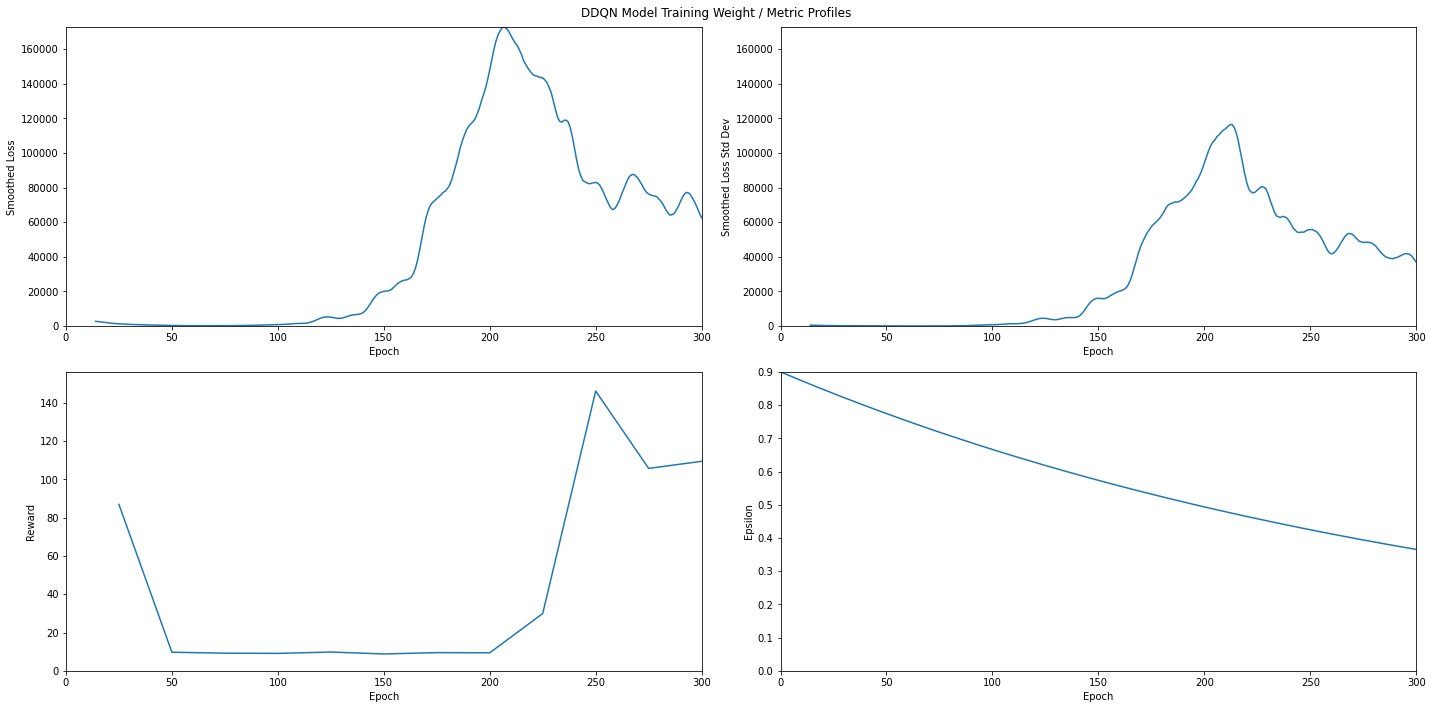

In [6]:
sim.run()

In [7]:
sim.train_model=False
sim.visualize_test=True
sim.run()

Average trial score: 162.1±51.46542528727417
